<a href="https://colab.research.google.com/github/abhay43/DL_Code/blob/master/DL-Gender%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import gzip
import shutil
import tarfile
import numpy as np


In [3]:
data = tarfile.open('/content/drive/My Drive/Colab Notebooks/UTKFace.tar.gz','r')
data.extractall()

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Dense, Dropout, Activation,Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, shutil
from shutil import copy

In [6]:
#shutil.rmtree('/content/UTKFace/train') 

In [7]:
all_Faces = os.listdir('/content/UTKFace')
train_parent_dir = '/content/data/train'
test_parent_dir = '/content/data/test'
train = 'male'
test = 'female'
train_path_male = os.path.join(train_parent_dir, train)
train_path_female  = os.path.join(train_parent_dir, test)
test_path_male = os.path.join(test_parent_dir, train)
test_path_female = os.path.join(test_parent_dir, test)

In [8]:
os.makedirs(train_path_male)
os.makedirs(train_path_female)
os.makedirs(test_path_male)
os.makedirs(test_path_female)

In [9]:
for i,f in enumerate(all_Faces):
  if(i >1500):    
    if(f.split('_')[1] == '0'):
      shutil.copyfile( '/content/UTKFace/'+str(f), train_path_male+str('/')+str(f))
    elif(f.split('_')[1] == '1'):
      shutil.copyfile('/content/UTKFace/'+str(f) ,train_path_female+str('/')+str(f) )
  else:
    if(f.split('_')[1] == '0'):
      shutil.copy('/content/UTKFace/'+str(f),test_path_male+str('/')+str(f)  )
    elif(f.split('_')[1] == '1'):
      shutil.copy('/content/UTKFace/'+str(f),test_path_female+str('/')+str(f)  )


In [51]:
all_Faces[0].split('_')

['54', '0', '3', '20170119210111784.jpg.chip.jpg']

In [10]:
len(os.listdir('/content/data/train/female'))

10609

In [11]:
len(os.listdir('/content/data/train/male'))

11598

In [12]:
len(os.listdir('/content/data/test/female'))

708

In [13]:
len(os.listdir('/content/data/test/male'))

793

In [14]:
train_data_dir=r"/content/data/train"
test_data_dir=r"/content/data/test"
epochs= 20
batch_size= 20
img_weight, img_height =250, 250


In [15]:
#### Data Preprocessing-- 
train_datagen = ImageDataGenerator(zoom_range=0.2,rescale=1./255, horizontal_flip=True,shear_range=0.2 )
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_weight, img_height), classes=['male','female'], batch_size=batch_size, class_mode='binary')

Found 22207 images belonging to 2 classes.


In [17]:
validation_generator  = train_datagen.flow_from_directory(test_data_dir, target_size=(img_weight, img_height), batch_size=batch_size, class_mode='binary',classes=['male','female'])

Found 1501 images belonging to 2 classes.


In [18]:
## We need to set the input_shape for the model as it is used in the CNN
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_weight, img_height)
else:
    input_shape=(img_weight,img_height,3)

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]
model_3 = Sequential()
model_3.add(Conv2D(32,(3,3), input_shape = input_shape))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))
model_3.add(Dense(1, activation='sigmoid'))

In [20]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       7

In [21]:
training = model_3.fit_generator(train_generator,
                   epochs=epochs,
                   validation_data=validation_generator,
                       )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1111/1111 [==============================] - 323s 291ms/step - loss: 0.5534 - accuracy: 0.7461 - val_loss: 0.4081 - val_accuracy: 0.8314
Epoch 2/20
1111/1111 [==============================] - 322s 290ms/step - loss: 0.4098 - accuracy: 0.8097 - val_loss: 0.3681 - val_accuracy: 0.8394
Epoch 3/20
1111/1111 [==============================] - 324s 292ms/step - loss: 0.3729 - accuracy: 0.8283 - val_loss: 0.3689 - val_accuracy: 0.8374
Epoch 4/20
1111/1111 [==============================] - 326s 293ms/step - loss: 0.3382 - accuracy: 0.8440 - val_loss: 0.4010 - val_accuracy: 0.8155
Epoch 5/20
1111/1111 [==============================] - 326s 294ms/step - loss: 0.3241 - accuracy: 0.8546 - val_loss: 0.3028 - val_accuracy: 0.8654
Epoch 6/20
1111/1111 [==============================] - 329s 296ms/step - loss: 0.3085 - accuracy: 0.8650 - val_loss: 0.2857 - val_accuracy: 0.8721
Epoch 7/20
1111/1111 [==============

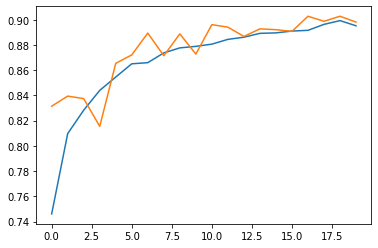

In [22]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])


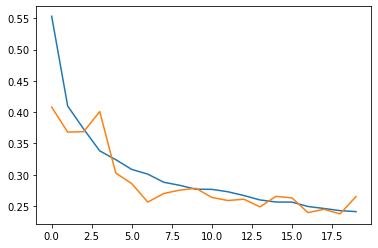

In [24]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

[[1.]]
Prediction:  female


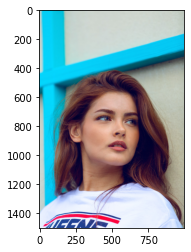

In [28]:
import numpy as np
img_pred = image.load_img("/content/drive/My Drive/Colab Notebooks/female.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="female"
else:
    prediction ="male"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/female.jpg')
imgplot = plt.imshow(img)
plt.show()


0.0
Prediction:  male


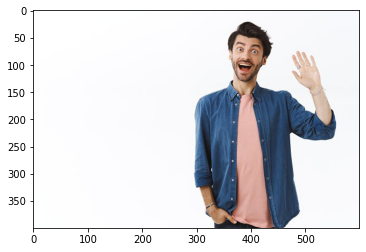

In [27]:
import numpy as np
img_pred = image.load_img("/content/drive/My Drive/Colab Notebooks/hi.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_3.predict(img_pred)
print(rslt[0][0])
if rslt[0][0]==1:
    prediction ="female"
else:
    prediction ="male"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/hi.jpg')
imgplot = plt.imshow(img)
plt.show()